# The ICM algorithm

### Requirements

* Magic state initializations

![alt text](y.png "Y")

![alt text](a.png "Y")

* Hadamard P and T gates

![alt text](HPT.png "HPT")

* V gate

![alt text](vgate.png "V gate")

## Toffoli and Hadamard interms of PVT
     
* Toffoli decomposition

![alt text](toffoli_decomposition.png "ICM algorithm")

* H decomposition

![alt text](H_decomposition.png "H decomposition")

* Measurement
     Z {0, 1} basis | X {+, -} basis

## Gate teleportation

![alt text](gate_teleportation.png "H decomposition")

## ICM algorithm

![alt text](icm_algo.png "ICM algorithm")

# Qutip

### Define a new circuit and add some gates

In [1]:
# Imports
import numpy as np
from qutip import QubitCircuit
from qutip.qip.icm import Icm
qcircuit = QubitCircuit(5)
qcircuit.add_gate("TOFFOLI", controls=[0, 1], targets=[2])
qcircuit.add_gate("SNOT", targets=[3])
qcircuit.add_gate("RX", targets=[5], arg_value=np.pi, arg_label=r'\pi')
qcircuit.add_gate("TOFFOLI", controls=[2, 3], targets=[4])

### Display circuit as gate list with name, targets, controls, arg_value, arg_label

In [ ]:
def display_gates(circuit):
    """
    This function displays the circuit as a list of gates
    """
    for gate in circuit.gates:
        print(gate, "| arg_label:", gate.arg_label, "| arg_value:", gate.arg_value)
        
display_gates(qcircuit)

### Initialise the ICM model with given circuit

In [ ]:
# Import the `Icm class` from the file icm.py
# In standard Python these imports should be in the begining of file

from qutip.qip.icm import Icm

# Create a new icm_model object
icm_model = Icm(qcircuit)
display_gates(icm_model.qcircuit)

## Functions defined in `icm.py`
### `decompose_gates()`

In [ ]:
# Decompose gates into Hadamard(SNOT), TOFFOLI, CNOT, P, T, V
decomposed = icm_model.decompose_gates()

# Display decomposed gates with rotation arguments
display_gates(decomposed)

# You can see that the RX (pi) rotation is decomposed into two RX(pi/2)
# This is because in ICM the valid basis gates are P, T, V which is rotation by
# RZ(pi/4), RZ(pi/2) and RX(pi/2)

In [ ]:
from qutip.qip.icm import _icm_gate_dict
for key in _icm_gate_dict:
    print(key, _icm_gate_dict[key])

### decompose_toffoli()

In [ ]:
from qutip.qip.icm import decompose_toffoli
toffoli_decomposed = decompose_toffoli(decomposed)

display_gates(toffoli_decomposed)

### `decompose_SNOT()`

In [ ]:
from qutip.qip.icm import decompose_SNOT

hadamard_decomposed = decompose_SNOT(decomposed)
display_gates(hadamard_decomposed)

In [ ]:
display_gates(decompose_SNOT(toffoli_decomposed))

# Ancillae cost calculation for a ICM circuit

![alt text](cost.png "Logo Title Text 1")

### `ancilla_cost()`

In [ ]:
"""
Calculate the number of ancillae for each gate in a given ICM circuit.
"""
ancilla = icm_model.ancilla_cost()
print(ancilla)

### `to_icm()`

In [ ]:
qcirc = QubitCircuit(1)
qcirc.add_gate("RX", targets=[0], arg_value=np.pi / 2, arg_label=r"\pi/2")

display_gates(qcirc)

In [ ]:
model = Icm(qcirc)
icm_representation = model.to_icm()

print("Number of qubits in gate is", icm_representation.N)
display_gates(icm_representation)

In [ ]:
qcirc = QubitCircuit(1)
qcirc.add_gate("RZ", targets=[0], arg_value=np.pi / 2, arg_label=r"\pi/2")

model = Icm(qcirc)
icm_representation = model.to_icm()

print("Number of qubits in gate is", icm_representation.N)
display_gates(icm_representation)

In [ ]:
qcirc = QubitCircuit(2)
qcirc.add_gate("CNOT", controls=[0], targets=[1])
qcirc.add_gate("RZ", targets=[1], arg_value=np.pi / 2, arg_label=r"\pi/2")
qcirc.add_gate("CNOT", targets=[0], controls=[1])
qcirc.add_gate("RX", targets=[1], arg_value=np.pi / 2, arg_label=r"\pi/2")

model = Icm(qcirc)
icm_representation = model.to_icm()

print("Number of qubits in gate is", icm_representation.N)
display_gates(icm_representation)

# Remaining work

* Implement the T gate using selective source and selective destination

* Implement conjugate gates

* More testing and verification

* TQC conversion and visualization

In [2]:
import numpy as np
from qutip import QubitCircuit
from qutip.qip.icm import Icm

qcirc = QubitCircuit(2, reverse_states=False)
qcirc.add_gate("CNOT", targets= [0], controls=[1])
qcirc.add_gate("CNOT", targets= [0], controls=[1])
qcirc.add_gate("RZ", arg_value = np.pi / 4, arg_label=r"\pi/4", targets=[0])
qcirc.add_gate("CNOT", targets= [0], controls=[1])
qcirc.add_gate("CNOT", targets= [0], controls=[1])

/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate A_state
  warnings.warn("Unknown gate %s" % name)
/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate 0_state
  warnings.warn("Unknown gate %s" % name)
/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate Y_state
  warnings.warn("Unknown gate %s" % name)
/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate +_state
  warnings.warn("Unknown gate %s" % name)


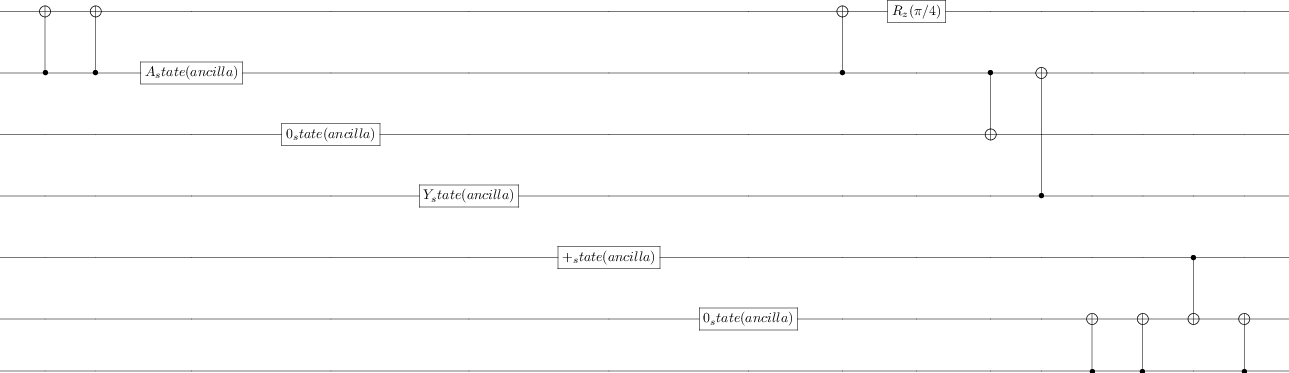

In [3]:
model = Icm(qcirc)

icm_representation = model.to_icm()

icm_representation.png